In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [2]:
proyectos = read_csv("data/mapeo_proyectos.csv")
investigadores = read_csv("data/mapeo_investigadores.csv")
recursos = read_csv("data/mapeo_recursos.csv")

In [3]:
proyectos.columns


Index(['ID proyecto', 'Título', 'Código proyecto', 'Descripción',
       'Área de procedencia/disciplina', 'Temas de investigación', 'Programa',
       'Subprograma', 'Palabra clave AEI', 'Focalizado en HD',
       'Temporalización (inicio)', 'Temporalización (fin)', 'Convocatoria',
       'Convocatoria (año)', 'Años', 'Financiación', 'Entidad financiadora',
       'Página web y redes sociales', 'Investigadores', 'ID investigadores',
       'Fuente de información', 'Estado', 'Fecha de publicación',
       'Última actualización', 'Nº de IPs', 'Género IP', 'CCAA', 'Organismo',
       'Centro'],
      dtype='object')

In [4]:
proyectos["Financiación"] = pd.to_numeric(proyectos["Financiación"], errors='coerce')

In [5]:
proyectos["Temas de investigación"]

0                  Análisis de imágenes | Artes visuales
1                  Análisis de imágenes | Artes visuales
2                                         Bases de datos
3                                         Bases de datos
4                                         Bases de datos
                             ...                        
481    Lingüística y lenguas | Lingüística computacional
482                                        Web semántica
483      Archivos digitales, repositorios y preservación
484      Archivos digitales, repositorios y preservación
485    Web semántica | Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 486, dtype: object

In [6]:
new_temas = [tema.split(" | ") for tema in proyectos[proyectos["Temas de investigación"].str.contains('|')]["Temas de investigación"]]
proyectos.loc[proyectos["Temas de investigación"].str.contains('|'), "Temas de investigación"] = new_temas


In [7]:
proyectos["Temas de investigación"]
# df.loc[df['Type'] == 'Fire', 'Name'] = new_names

0                 [Análisis de imágenes, Artes visuales]
1                 [Análisis de imágenes, Artes visuales]
2                                       [Bases de datos]
3                                       [Bases de datos]
4                                       [Bases de datos]
                             ...                        
481    [Lingüística y lenguas, Lingüística computacio...
482                                      [Web semántica]
483    [Archivos digitales, repositorios y preservación]
484    [Archivos digitales, repositorios y preservación]
485    [Web semántica, Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 486, dtype: object

In [8]:
mini = proyectos[["Temporalización (inicio)", "Temas de investigación"]]
grouped = mini.groupby("Temporalización (inicio)")

#for key, item in grouped:
 #   print(grouped.get_group(key), "\n\n")
    
# grouped.sum().reset_index().to_csv('organismo-temas.csv')

In [9]:
tema1 = proyectos.iloc[0,5]
for item in tema1: print(item)

Análisis de imágenes
Artes visuales


In [10]:
result_df = grouped.sum().reset_index()
counter_row =  []
for index, item in result_df.iterrows():
    counter_row.append(Counter(item["Temas de investigación"]).most_common(5))
    
result_df["contador"] = counter_row

In [11]:
result_df

,Temporalización (inicio),Temas de investigación,contador
0,1993,"[Actividades de corpus, Digitalización, creaci...","[(Actividades de corpus, 1), (Digitalización, ..."
1,1995,"[Análisis de imágenes, Artes visuales, Bases d...","[(Análisis de imágenes, 3), (Bases de datos, 2..."
2,1996,"[Análisis de imágenes, Artes visuales, Activid...","[(Análisis de imágenes, 4), (Actividades de co..."
3,1998,[Bibliotecas digitales],"[(Bibliotecas digitales, 1)]"
4,1999,"[-, Literatura Digital]","[(-, 1), (Literatura Digital, 1)]"
5,2000,"[Arqueología del paisaje, Artes visuales, Arch...","[(Artes visuales, 2), (Arqueología del paisaje..."
6,2003,"[Digitalización, creación de recursos, Métodos...","[(Digitalización, creación de recursos, 1), (M..."
7,2004,"[Archivos digitales, repositorios y preservaci...","[(Archivos digitales, repositorios y preservac..."
8,2005,"[Lingüística y lenguas, Lingüística computacio...","[(Lingüística computacional, 4), (Lingüística ..."
9,2006,"[Bibliotecas digitales, Digitalización, creaci...","[(Bibliotecas digitales, 4), (Bases de datos, ..."


In [14]:
# https://stackoverflow.com/questions/43059235/python-stacked-barchart-from-counter-using-matplotlib

#series = {}
#for key in {key for keys in counter_row for key in keys}:
#    series[key] = [(0 if key not in item else item[key]) for item in counter_row]

In [13]:
series = []
for index, item in result_df.iterrows():
    for value, count in item["contador"]:
        series.append((item["Temporalización (inicio)"], value, count))

series

[(1993.0, 'Actividades de corpus', 1),
 (1993.0, 'Digitalización, creación de recursos', 1),
 (1993.0, 'OCR', 1),
 (1995.0, 'Análisis de imágenes', 3),
 (1995.0, 'Bases de datos', 2),
 (1995.0, 'Artes visuales', 1),
 (1996.0, 'Análisis de imágenes', 4),
 (1996.0, 'Actividades de corpus', 3),
 (1996.0, 'Bases de datos', 3),
 (1996.0, 'Literatura Digital', 3),
 (1996.0, 'Artes visuales', 1),
 (1998.0, 'Bibliotecas digitales', 1),
 (1999.0, '-', 1),
 (1999.0, 'Literatura Digital', 1),
 (2000.0, 'Artes visuales', 2),
 (2000.0, 'Arqueología del paisaje', 1),
 (2000.0, 'Archivos digitales, repositorios y preservación', 1),
 (2000.0, 'Análisis de imágenes', 1),
 (2003.0, 'Digitalización, creación de recursos', 1),
 (2003.0, 'Métodos bibliográficos/estudios textuales', 1),
 (2003.0, 'Bases de datos', 1),
 (2003.0, 'Bibliotecas digitales', 1),
 (2004.0, 'Archivos digitales, repositorios y preservación', 3),
 (2004.0, 'Bibliotecas digitales', 3),
 (2004.0, 'Digitalización, creación de recursos',

In [18]:
# years_df = pd.DataFrame.from_dict(series)
years_df = pd.DataFrame(series, columns=["year","tema", "cuenta"])
years_df = years_df[years_df.year != "-"]
years_df


,year,tema,cuenta
0,1993,Actividades de corpus,1
1,1993,"Digitalización, creación de recursos",1
2,1993,OCR,1
3,1995,Análisis de imágenes,3
4,1995,Bases de datos,2
...,...,...,...
96,2019,Patrimonio digital,7
97,2019,Bibliotecas digitales,5
98,2019,Bases de datos,4
99,2019,Lingüística computacional,4


In [19]:
# years_df = years_df.set_index(pd.Index(result_df["Temporalización (inicio)"].values))
pivot_df = years_df.pivot(index='year', columns='tema', values='cuenta')
pivot_df

tema,-,Actividades de corpus,Análisis de imágenes,Análisis de interfaces y tecnología,"Archivos digitales, repositorios y preservación",Arqueología del paisaje,Artes visuales,Bases de datos,Bibliotecas digitales,Ciencias y Técnicas Historiográficas,...,Lingüística y lenguas,Literatura Digital,Minado de datos/Minado de texto,Métodos bibliográficos/estudios textuales,OCR,Patrimonio digital,Realidad virtual y aumentada,Sistemas de Información Geográfica y análisis geoespacial,Web semántica,XML
year,,,,,,,,,,,,,,,,,,,,,
1993.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,3.0,4.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000.0,NaN,NaN,1.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2004.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graph

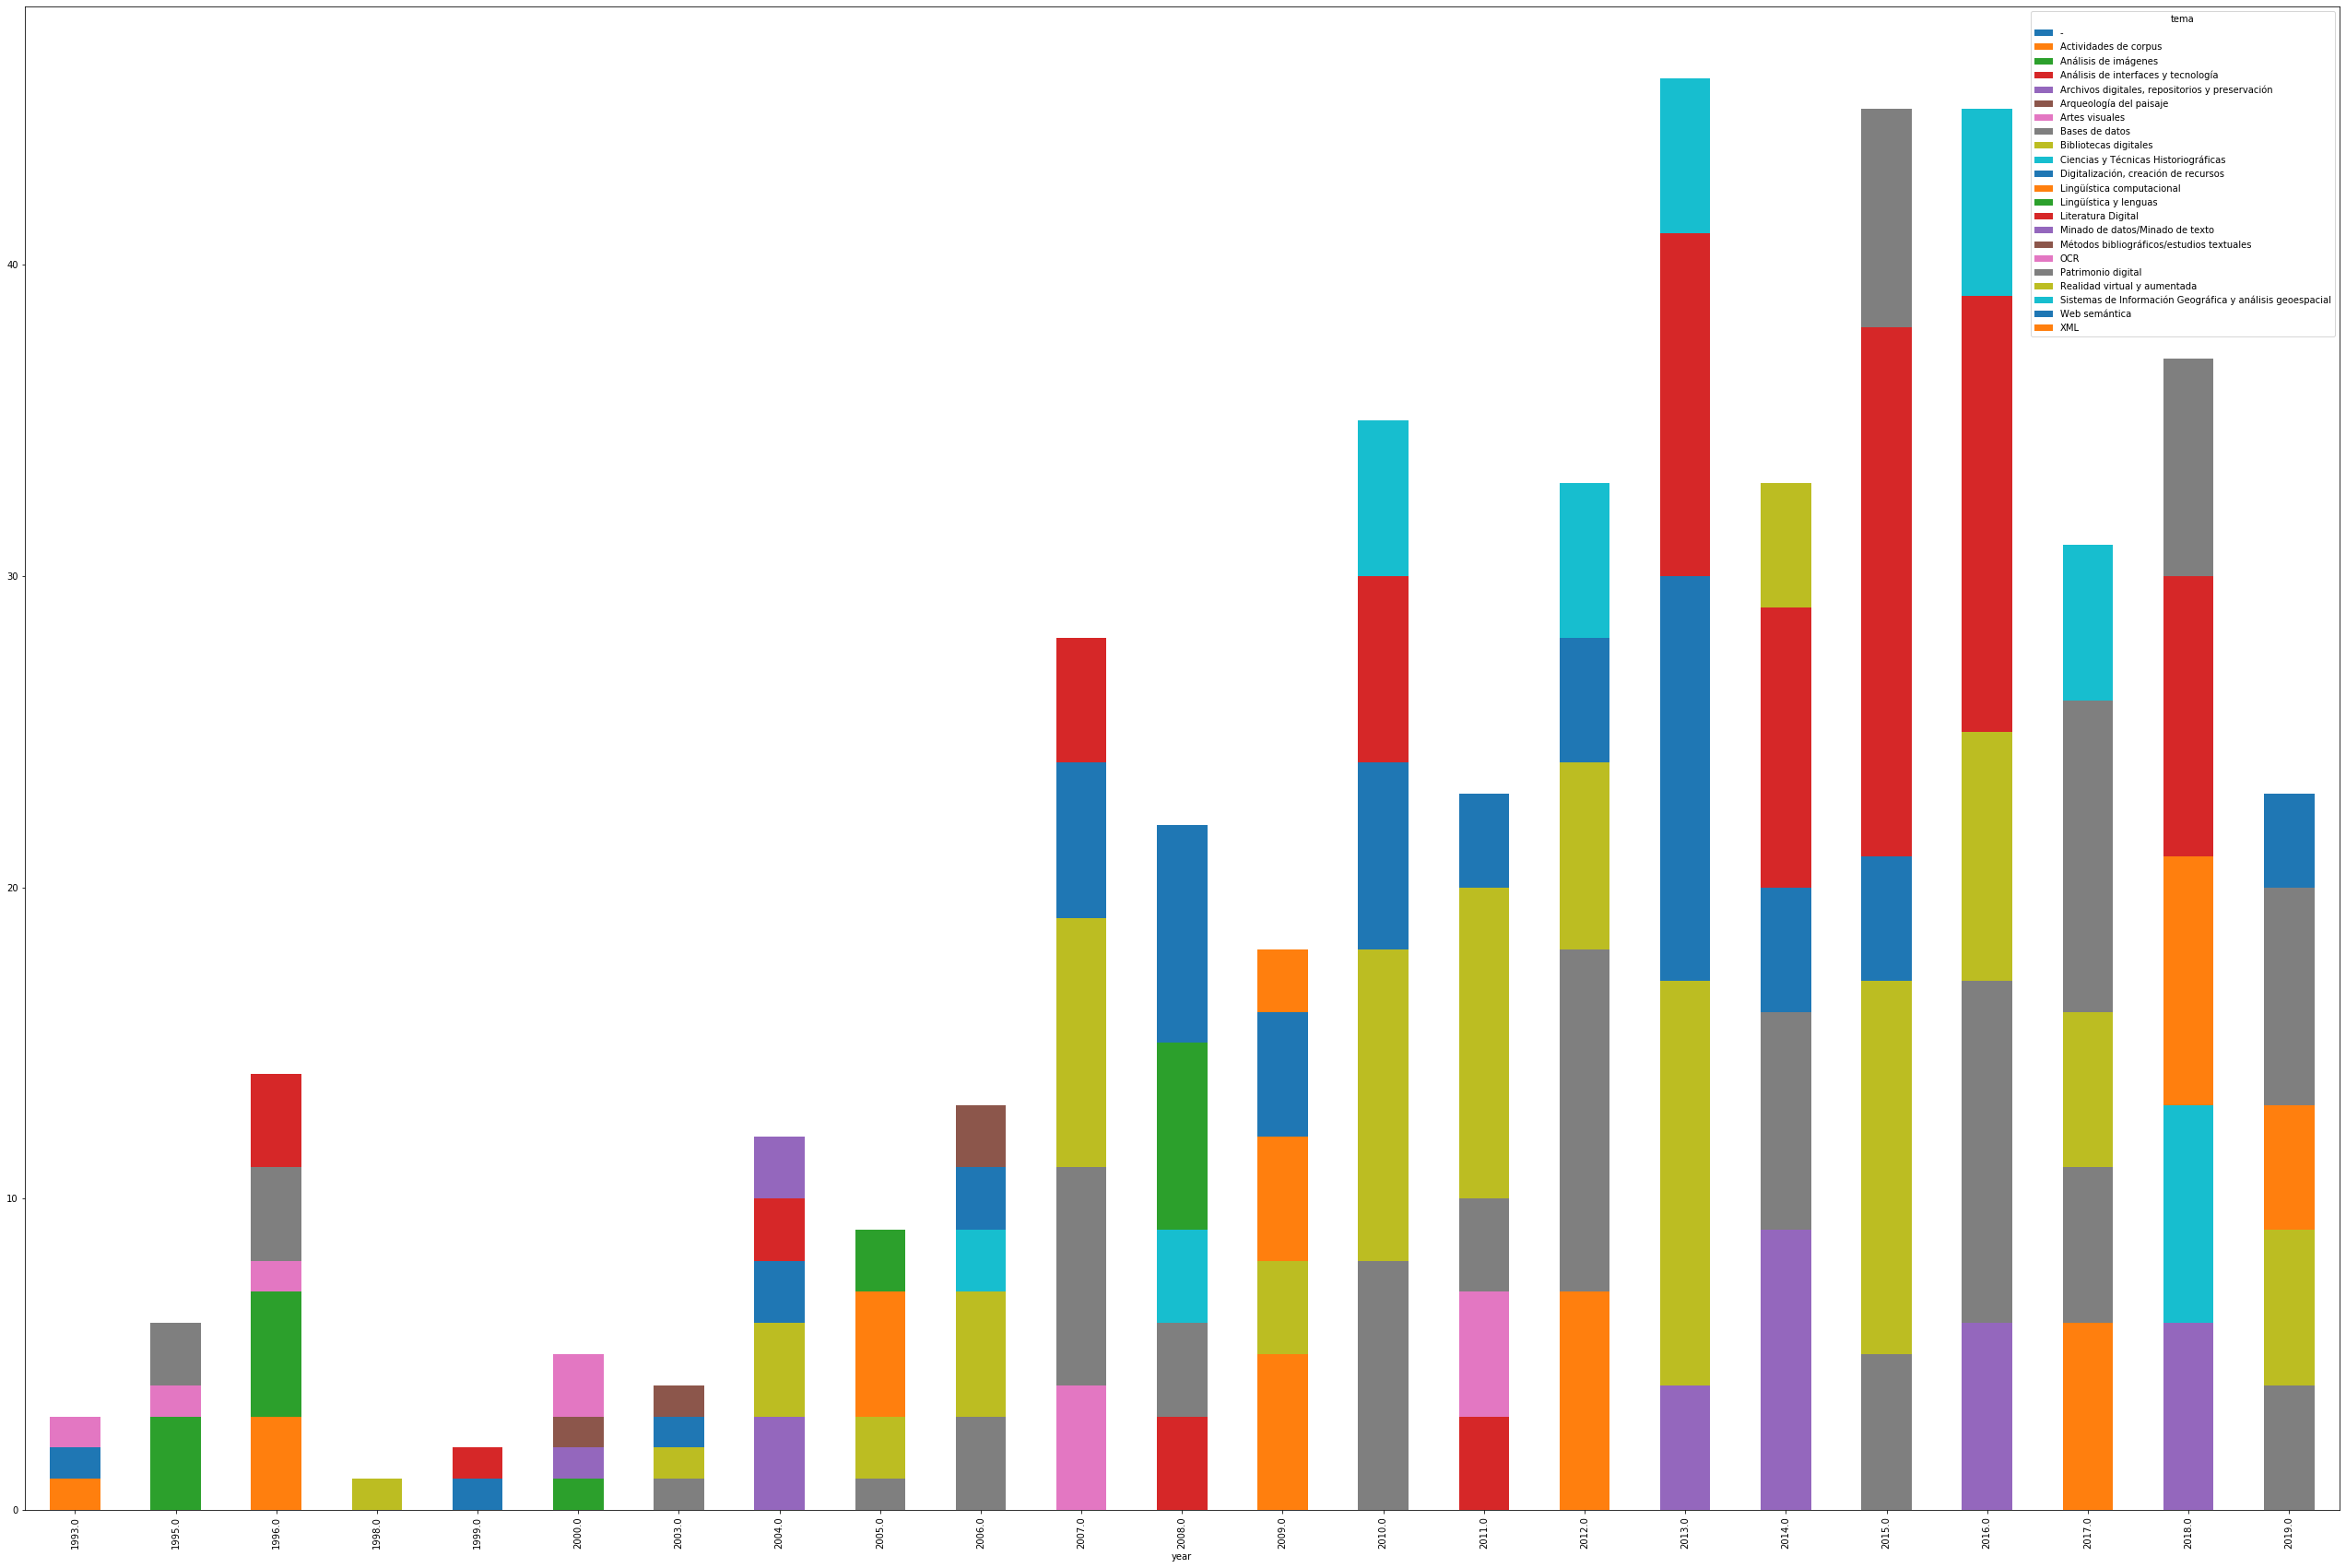

In [20]:
years_df.to_csv("data/modas.csv")
pivot_df.plot.bar(stacked=True, figsize=(45,30))

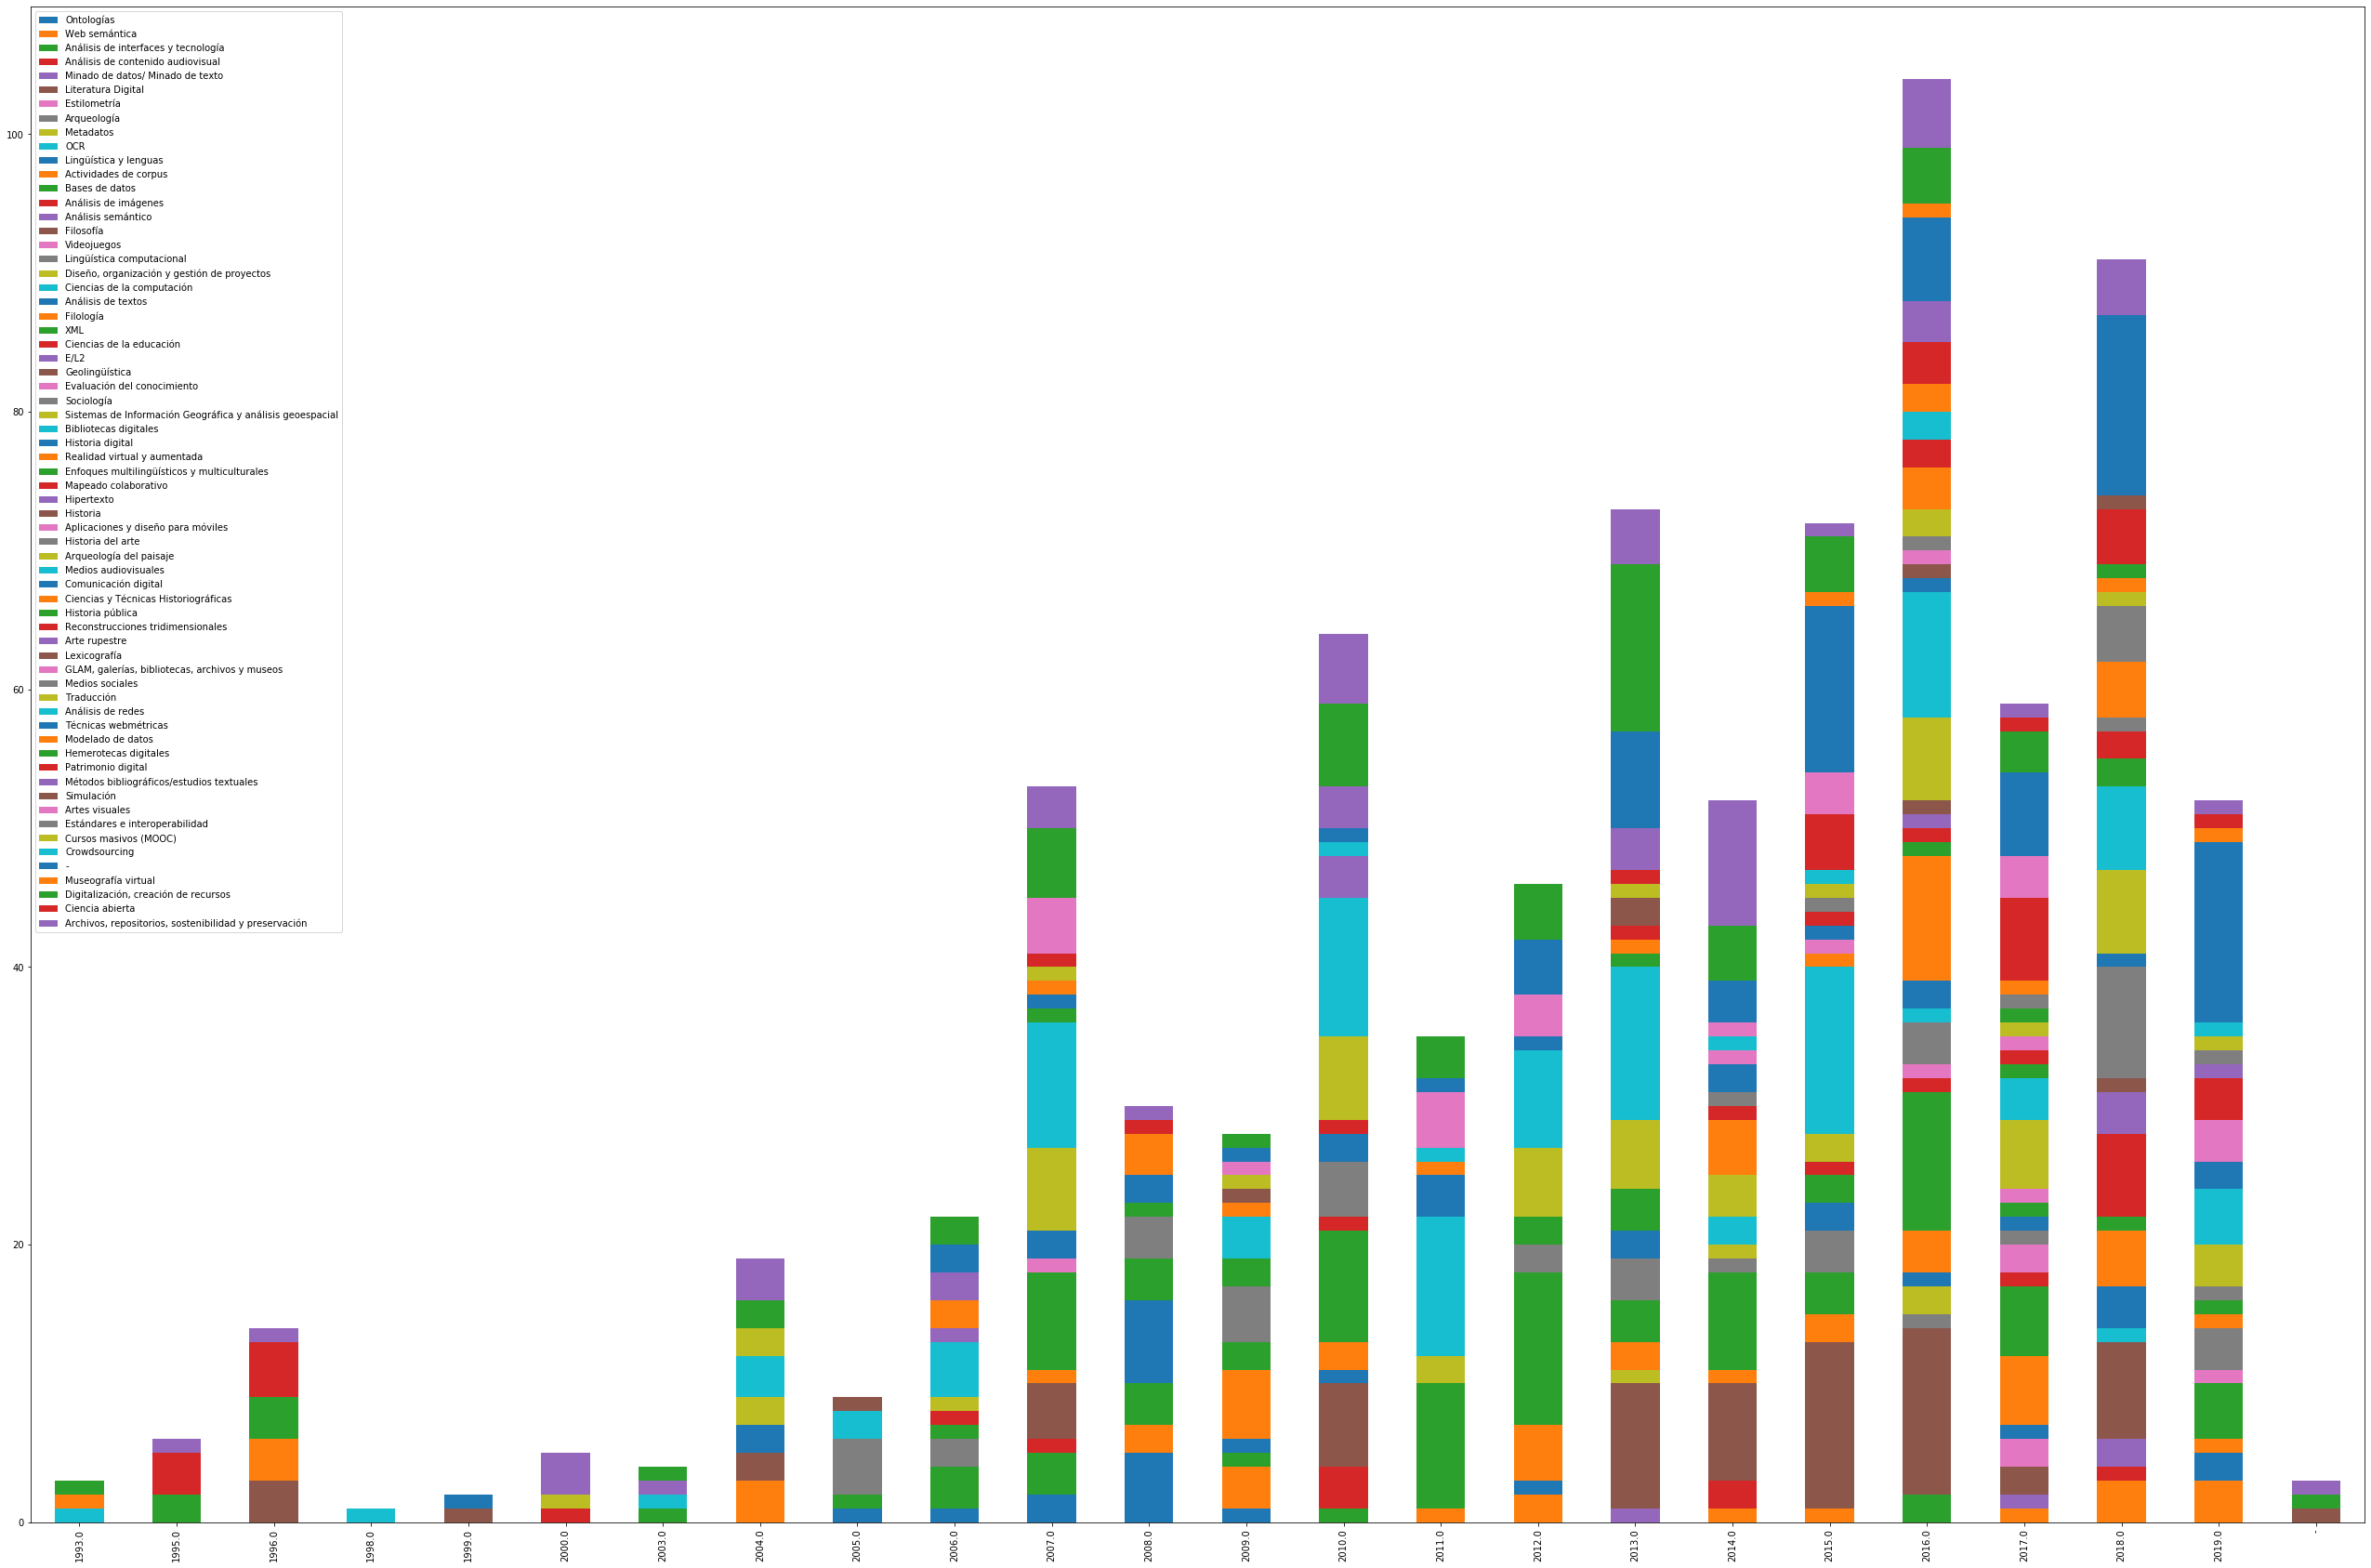

In [22]:
years_df.plot.bar(stacked=True, figsize=(45,30))
plt.savefig('img/modas.png', dpi=300)

In [72]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [73]:
colors = sns.color_palette("cubehelix", n_colors=len(temas_df.columns))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

In [87]:
colorcitos = ["#a14b49",
"#fc60ab",
"#744232",
"#f4200d",
"#29d6e7",
"#582f40",
"#2fe43e",
"#da1547",
"#1bd94f",
"#f7a4fa",
"#92503f",
"#78677f",
"#dfdc2b",
"#8b8352",
"#da98ed",
"#fa4920",
"#8311c0",
"#7131a7",
"#62a719",
"#388744",
"#5a0618",
"#83772d",
"#e204f8",
"#44752b",
"#b92b87",
"#02c57d",
"#52544b",
"#d57fd7",
"#faaa6f",
"#a0b84d",
"#54d47a",
"#bcc057",
"#93f52f",
"#d2e9b8",
"#8f2c0c",
"#83a43e",
"#d261c5",
"#cec4cd",
"#4054e5",
"#93bd30",
"#5b3460",
"#61c10e",
"#03bbab",
"#f58206",
"#0ca3fa",
"#02c5fa",
"#f68864",
"#6921e8",
"#4cee95",
"#dd33f3",
"#3113db",
"#8b1fec",
"#15ddef",
"#b21c0e",
"#d50ddd",
"#849f7c",
"#8c0c5a",
"#88e023",
"#2d9a80",
"#c19ac3",
"#a88393",
"#1f5886",
"#52fe38",
"#c47cc7",
"#c9a550",
]

In [93]:
col2 = colorcitos.sort()

In [96]:
colorcitos

['#02c57d',
 '#02c5fa',
 '#03bbab',
 '#0ca3fa',
 '#15ddef',
 '#1bd94f',
 '#1f5886',
 '#29d6e7',
 '#2d9a80',
 '#2fe43e',
 '#3113db',
 '#388744',
 '#4054e5',
 '#44752b',
 '#4cee95',
 '#52544b',
 '#52fe38',
 '#54d47a',
 '#582f40',
 '#5a0618',
 '#5b3460',
 '#61c10e',
 '#62a719',
 '#6921e8',
 '#7131a7',
 '#744232',
 '#78677f',
 '#8311c0',
 '#83772d',
 '#83a43e',
 '#849f7c',
 '#88e023',
 '#8b1fec',
 '#8b8352',
 '#8c0c5a',
 '#8f2c0c',
 '#92503f',
 '#93bd30',
 '#93f52f',
 '#a0b84d',
 '#a14b49',
 '#a88393',
 '#b21c0e',
 '#b92b87',
 '#bcc057',
 '#c19ac3',
 '#c47cc7',
 '#c9a550',
 '#cec4cd',
 '#d261c5',
 '#d2e9b8',
 '#d50ddd',
 '#d57fd7',
 '#da1547',
 '#da98ed',
 '#dd33f3',
 '#dfdc2b',
 '#e204f8',
 '#f4200d',
 '#f58206',
 '#f68864',
 '#f7a4fa',
 '#fa4920',
 '#faaa6f',
 '#fc60ab']

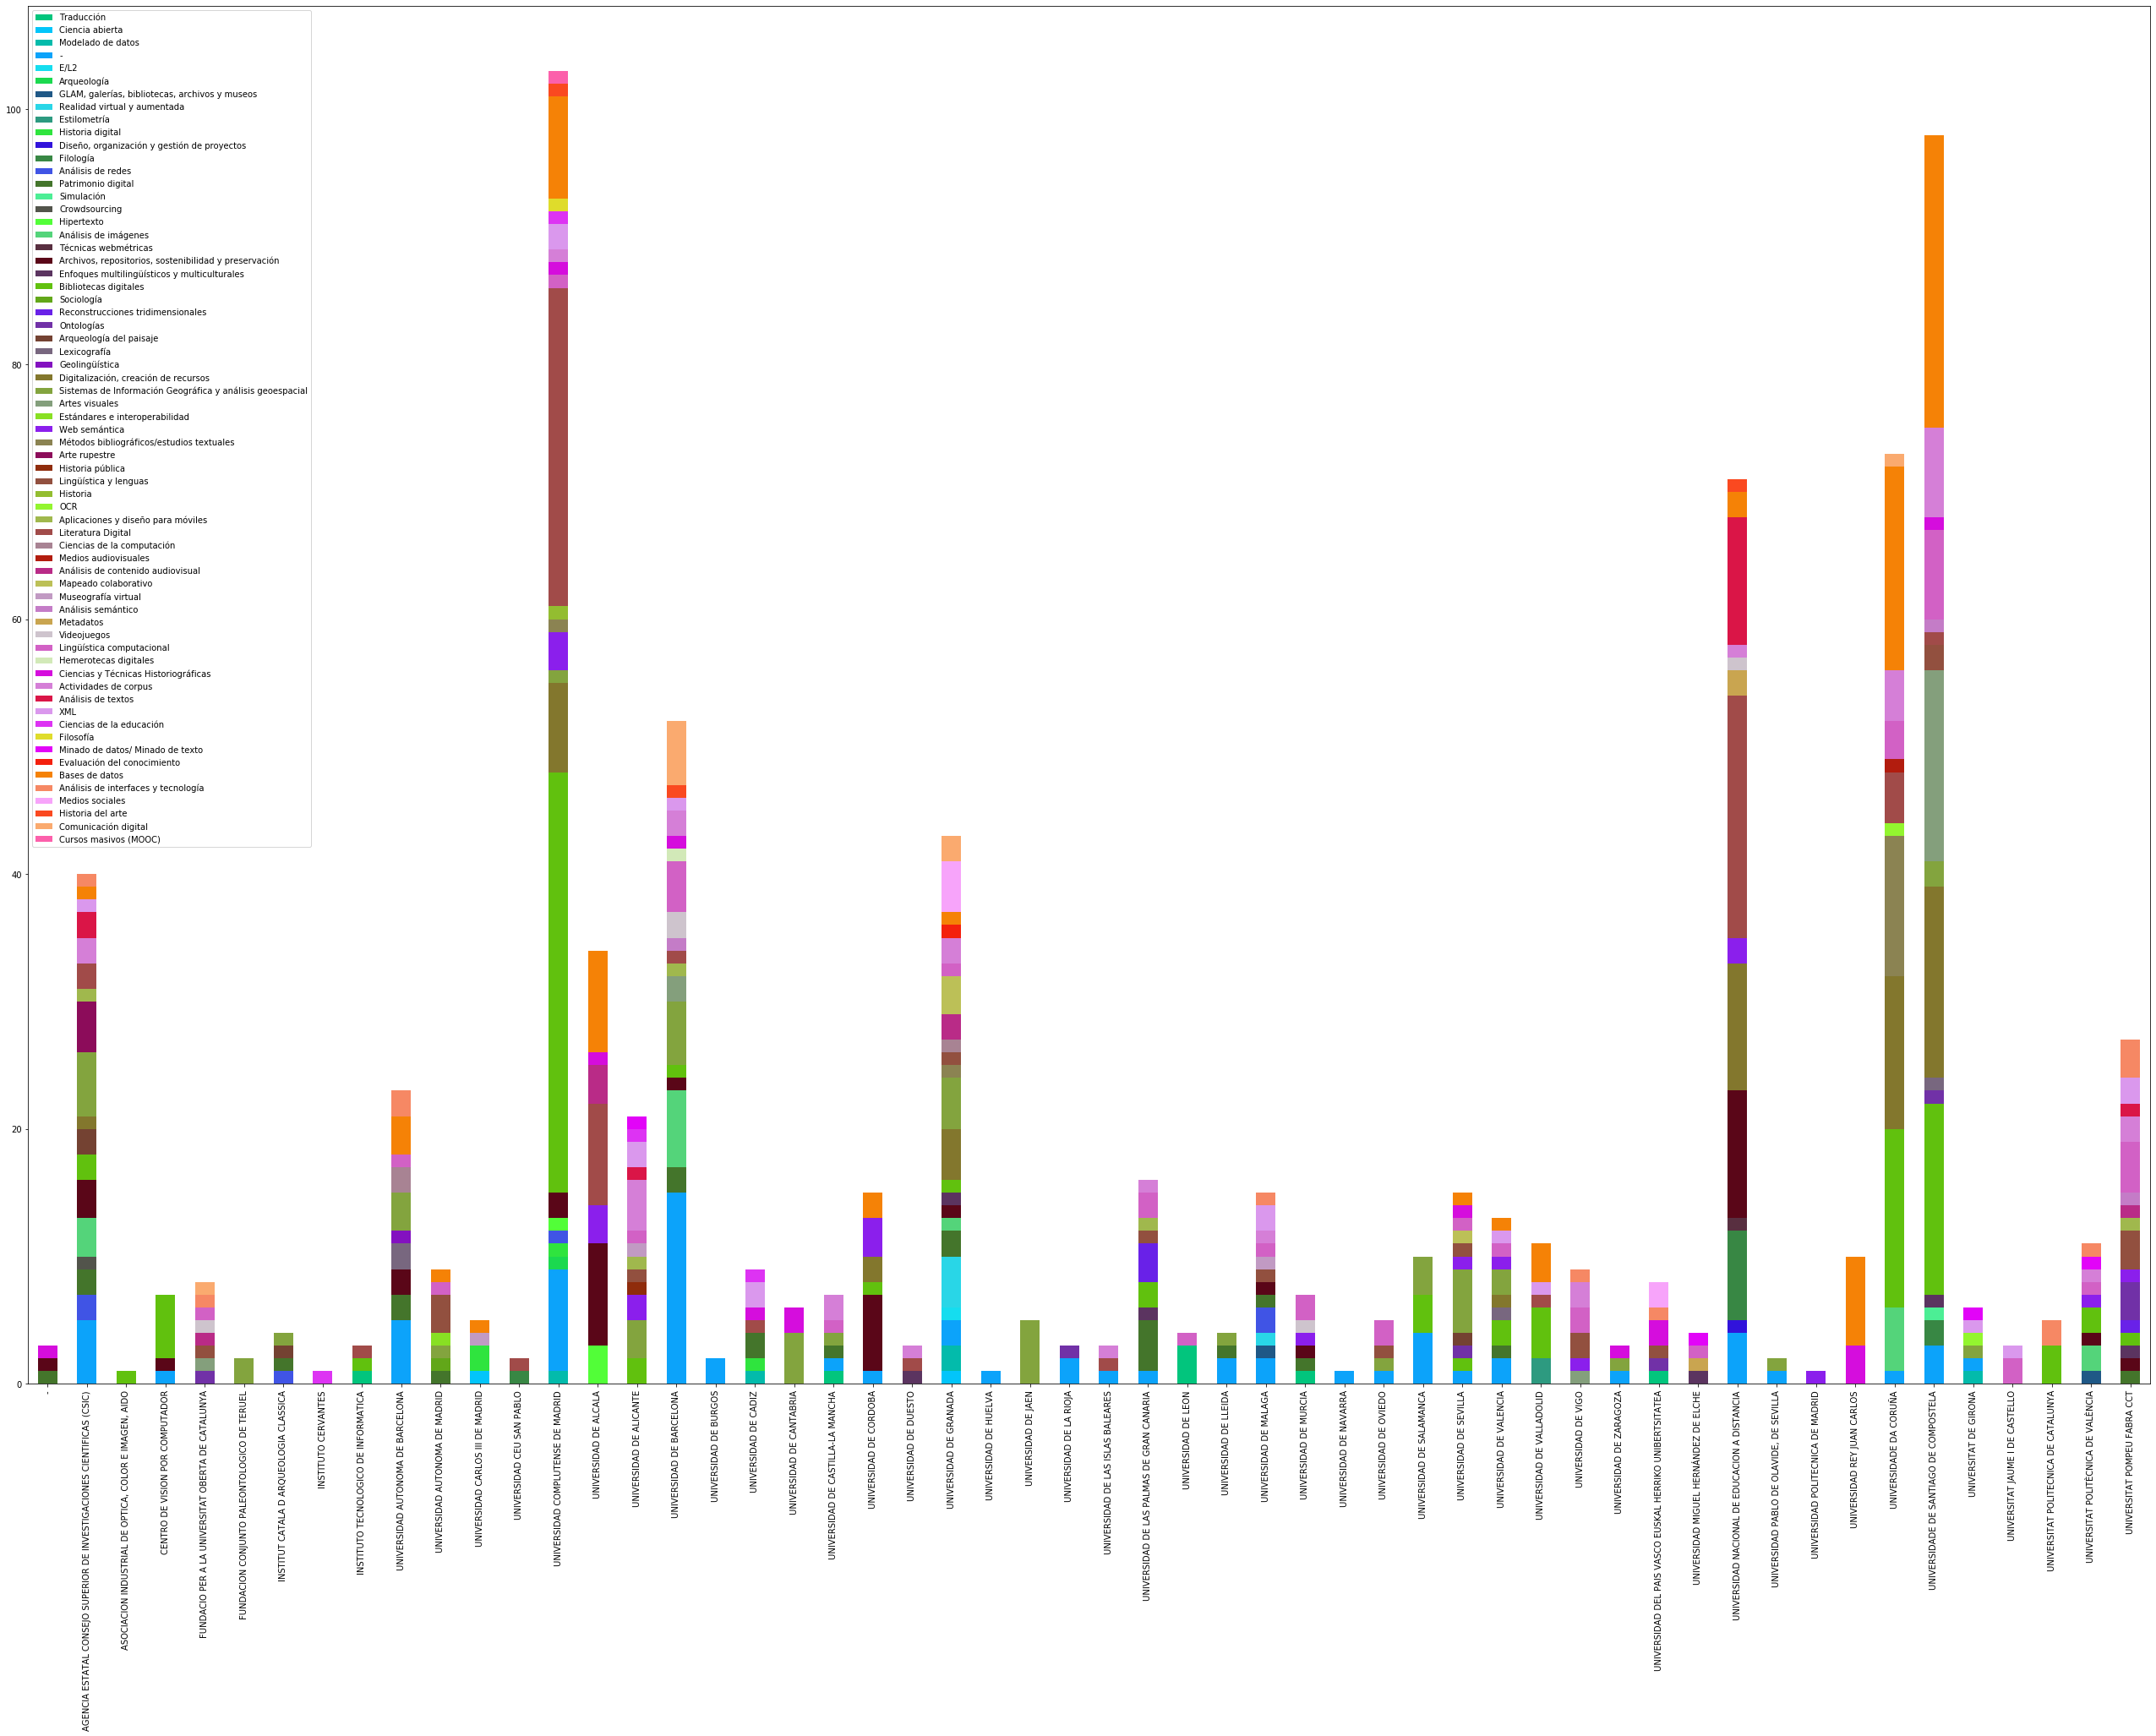

In [97]:
temas_df.plot.bar(stacked=True, figsize=(45,30), color=colorcitos)
plt.savefig('filename.png', dpi=300)